In [36]:
import pandas as pd

In [37]:
import time
from tqdm.notebook import tqdm
def scrape_race_results(race_id_list, pre_race_results={}):
    race_results = pre_race_results
    for race_id in tqdm(race_id_list):
        if race_id in race_results.keys():
            continue
        try:
            time.sleep(1)
            url = "https://db.netkeiba.com/race/" + race_id
            race_results[race_id] = pd.read_html(url)[0]
        except IndexError:
            continue
        except Exception as e:
            print(e)
        except:
            break
    return race_results



In [38]:
race_id_list=[]
for place in range(1,11):
    for kai in range(1,6):
        for day in range(1,9):
            for race in range(1,13):
                race_id = "2019"+str(place).zfill(2)+str(kai).zfill(2)+str(day).zfill(2)+str(race).zfill(2)
                race_id_list.append(race_id)

In [39]:
for key in tes2:
    tes2[key].index = [key] * len(tes2[key])
results = pd.concat([tes2[key] for key in tes2], sort=False) 
#results.to_pickle('results.pickle')

NameError: name 'tes2' is not defined

In [43]:
results=pd.read_pickle('results.pickle')
results["着順"].value_counts()
results2=results[~(results["着順"].astype(str).str.contains("\D"))]
results2["着順"]=results2["着順"].astype(int)
results2["単勝"]=results2["単勝"].astype(float)

C:\Users\ingre\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\ingre\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [44]:
results2["性"]=results2["性齢"].map(lambda x:str(x)[0])
results2["年齢"]=results2["性齢"].map(lambda x:str(x)[1:])
results2["体重"]=results2["馬体重"].str.split("(",expand=True)[0].astype(int)
results2["体重変化"]=results2["馬体重"].str.split("(",expand=True)[1].str[:-1].astype(int)

C:\Users\ingre\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\ingre\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ingre\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [45]:
results2["年齢"]=results2["年齢"].astype(int)
results2.drop(["馬体重","性齢","性齢","タイム","調教師"],axis=1,inplace=True)
results2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43302 entries, 201901010101 to 201910020812
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   着順      43302 non-null  int32  
 1   枠番      43302 non-null  int64  
 2   馬番      43302 non-null  int64  
 3   馬名      43302 non-null  object 
 4   斤量      43302 non-null  float64
 5   騎手      43302 non-null  object 
 6   着差      40117 non-null  object 
 7   単勝      43302 non-null  float64
 8   人気      43302 non-null  float64
 9   性       43302 non-null  object 
 10  年齢      43302 non-null  int32  
 11  体重      43302 non-null  int32  
 12  体重変化    43302 non-null  int32  
dtypes: float64(3), int32(4), int64(2), object(4)
memory usage: 4.0+ MB


C:\Users\ingre\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\ingre\anaconda3\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [46]:
import datetime
def preprocessing(results):
    df = results.copy()

    # 着順に数字以外の文字列が含まれているものを取り除く
    df = df[~(df["着順"].astype(str).str.contains("\D"))]
    df["着順"] = df["着順"].astype(int)

    # 性齢を性と年齢に分ける
    df["性"] = df["性齢"].map(lambda x: str(x)[0])
    df["年齢"] = df["性齢"].map(lambda x: str(x)[1:]).astype(int)

    # 馬体重を体重と体重変化に分ける
    df["体重"] = df["馬体重"].str.split("(", expand=True)[0].astype(int)
    df["体重変化"] = df["馬体重"].str.split("(", expand=True)[1].str[:-1].astype(int)

    # データをint, floatに変換
    df["単勝"] = df["単勝"].astype(float)

    # 不要な列を削除
    df.drop(["タイム", "着差", "調教師", "性齢", "馬体重"], axis=1, inplace=True)
    
    df["date"]=pd.to_datetime(df["date"],format='%Y年%m月%d日')
    return df

## ロジスティクス回帰モデルによる予測

In [47]:
results=results2
clip_rank = lambda x: x if x < 4 else 4 #分類１位，２位，３位，4位以下の4グループに分類
results["rank"] = results["着順"].map(clip_rank)
results.drop(["着順", "馬名"], axis=1, inplace=True)
results_d=pd.get_dummies(results)
results_d

,枠番,馬番,斤量,単勝,人気,年齢,体重,体重変化,rank,騎手_アヴドゥ,...,着差_8,着差_9,着差_アタマ,着差_クビ,着差_ハナ,着差_同着,着差_大,性_セ,性_牝,性_牡
201901010101,1,1,54.0,1.4,1.0,2,518,-16,1,0,...,0,0,0,0,0,0,0,0,0,1
201901010101,3,3,54.0,3.5,2.0,2,496,-8,2,0,...,0,0,0,0,0,0,1,0,0,1
201901010101,4,4,51.0,46.6,6.0,2,546,6,3,0,...,0,0,0,0,0,0,0,0,0,1
201901010101,8,9,51.0,56.8,7.0,2,458,-8,4,0,...,0,0,0,0,0,0,0,0,0,1
201901010101,5,5,54.0,140.3,9.0,2,436,0,4,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201910020812,7,12,52.0,45.7,10.0,3,414,6,4,0,...,0,0,0,0,0,0,0,0,1,0
201910020812,3,3,55.0,29.8,9.0,4,486,2,4,0,...,0,0,0,0,0,0,0,0,1,0
201910020812,5,7,55.0,29.6,8.0,4,476,6,4,0,...,0,0,0,1,0,0,0,0,1,0
201910020812,8,13,49.0,134.8,12.0,3,472,2,4,0,...,0,0,0,0,0,0,0,0,1,0


In [48]:
from sklearn.model_selection import train_test_split

X = results_d.drop(["rank"], axis=1)
y = results_d["rank"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.3, random_state=0
)

In [101]:
!pip install -U imbalanced-learn

In [49]:
#不均衡データの処理
from imblearn.under_sampling import RandomUnderSampler

rank_1 = y_train.value_counts()[1]
rank_2 = y_train.value_counts()[2]
rank_3 = y_train.value_counts()[3]
#変更点
rus = RandomUnderSampler(
    sampling_strategy={1: rank_1, 2: rank_2, 3: rank_3, 4: rank_1}, random_state=42
)
X_train_rus, y_train_rus = rus.fit_resample(X_train.values, y_train.values)


In [50]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_rus, y_train_rus)

C:\Users\ingre\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [51]:
print(model.score(X_train, y_train), model.score(X_test, y_test))

0.5442578601827719 0.5449926872450158


In [52]:
y_pred = model.predict(X_test)
pred_df = pd.DataFrame({"pred": y_pred, "actual": y_test})
pred_df[pred_df["pred"] == 1]["actual"].value_counts()

4    1520
1     676
2     556
3     441
Name: actual, dtype: int64

In [53]:
coefs = pd.Series(model.coef_[0], index=X.columns).sort_values()
coefs[["枠番", "馬番", "斤量", "単勝", "人気", "年齢", "体重", "体重変化"]]

枠番     -0.006392
馬番      0.007272
斤量      0.009987
単勝     -0.010567
人気     -0.128063
年齢     -0.027298
体重      0.000683
体重変化    0.002370
dtype: float64

In [111]:
results[results["騎手"]=="レーン"]['rank'].value_counts()

4    43
1    32
3    14
2     9
Name: rank, dtype: int64

## ランダムフォレストによる予測

In [54]:
import requests
from bs4 import BeautifulSoup

race_id="201901010101"
url="https://db.netkeiba.com/race/"+race_id
html=requests.get(url)
html.encoding='EUC-JP'
soup=BeautifulSoup(html.text,"html.parser")

In [55]:
text=soup.find('div',attrs={'class':'data_intro'}).find_all("p")[0].text

In [56]:
import re
re.findall(r"\w+",text)

['芝右1800m', '天候', '曇', '芝', '良', '発走', '09', '50']

In [57]:
text2=soup.find('div',attrs={'class':'data_intro'}).find_all("p")[1].text
re.findall(r"\w+",text2)

['2019年7月27日', '1回札幌1日目', '2歳未勝利', '混', '指', '馬齢']

In [59]:
import time
from tqdm.notebook import tqdm
results=pd.read_pickle('results.pickle')
results=preprocessing(results)
race_id_list=results.index.unique()[:50]
race_infos={}
for race_id in tqdm(race_id_list):
    url="https://db.netkeiba.com/race/"+race_id
    html=requests.get(url)
    html.encoding='EUC-JP'
    soup=BeautifulSoup(html.text,"html.parser")
    
    texts=soup.find('div',attrs={'class':'data_intro'}).find_all("p")[0].text+\
        soup.find('div',attrs={'class':'data_intro'}).find_all("p")[1].text
    info=re.findall(r"\w+",texts)
    info_dict={}
    for text in info:
        if text in ["芝","ダート"]:
            info_dict["race_type"]=text
        if "障" in text:
            info_dict["race_type"]="障害"
        if "m" in text:
            info_dict["course_len"] = re.findall(r"\d+",text)[0]
        if text in ["良","稍重","重","不良"]:
            info_dict["ground_state"] = text
        if text in ["曇","晴","雨","小雨","小雪","雪"]:
            info_dict["weather"] = text
        if "年" in text:
            info_dict["date"] = text
    race_infos[race_id] = info_dict
    time.sleep(1)

KeyError: 'date'

In [61]:
pd.DataFrame(race_infos)

,course_len,weather,race_type,ground_state,date
201901010101,1800,曇,芝,良,2019年7月27日
201901010102,1000,曇,ダート,良,2019年7月27日
201901010103,2400,曇,ダート,良,2019年7月27日
201901010104,2000,晴,芝,良,2019年7月27日
201901010105,1500,晴,芝,良,2019年7月27日
...,...,...,...,...,...
201910020808,1000,曇,ダート,稍重,2019年8月18日
201910020809,1700,曇,ダート,稍重,2019年8月18日
201910020810,1800,曇,芝,良,2019年8月18日
201910020811,1200,曇,芝,良,2019年8月18日


In [62]:
import time
import requests
from tqdm.notebook import tqdm
def scrape_race_info(race_id_list,pre={}):
    race_infos = pre
    for race_id in tqdm(race_id_list):
        try:
            url = "https://db.netkeiba.com/race/"+race_id
            html = requests.get(url)
            html.encoding = "EUC-JP"
            soup = BeautifulSoup(html.text,"html.parser")
    
            texts = soup.find('div',attrs={"class":"data_intro"}).find_all("p")[0].text+soup.find('div',attrs={"class":"data_intro"}).find_all("p")[1].text
            info = re.findall(r"\w+",texts)
            info_dict = {}
            for text in info:
                if text in ["芝","ダート"]:
                    info_dict["race_type"]=text
                if "障" in text:
                    info_dict["race_type"] = "障害"
                if "m" in text:
                    info_dict["course_len"] = re.findall(r"\d+",text)[0]
                if text in ["良","稍重","重","不良"]:
                    info_dict["ground_state"] = text
                if text in ["曇","晴","雨","小雨","小雪","雪"]:
                    info_dict["weather"] = text
                if "年" in text:
                    info_dict["date"] = text
            race_infos[race_id] = info_dict
            time.sleep(1)
        except IndexError:
            continue
        except Exception as e:
            print(e)
        except:
            break
    return race_infos

def split_data(df,test_size=0.3):
    sorted_id_list=df.sort_values("date").index.unique()
    train_id_list=sorted_id_list[:round(len(sorted_id_list)*(1-test_size))]
    test_id_list=sorted_id_list[round(len(sorted_id_list)*(test_size)):]
    train=df.loc[train_id_list]
    test=df.loc[test_id_list]
    return train,test

def scrape_race_results(race_id_list, pre_race_results={}):
    race_results = pre_race_results
    for race_id in tqdm(race_id_list):
        if race_id in race_results.keys():
            continue
        try:
            time.sleep(1)
            url = "https://db.netkeiba.com/race/" + race_id
            race_results[race_id] = pd.read_html(url)[0]
        except IndexError:
            continue
        except Exception as e:
            print(e)
        except:
            break
    return race_results

import datetime
def preprocessing(results):
    df = results.copy()

    # 着順に数字以外の文字列が含まれているものを取り除く
    df = df[~(df["着順"].astype(str).str.contains("\D"))]
    df["着順"] = df["着順"].astype(int)

    # 性齢を性と年齢に分ける
    df["性"] = df["性齢"].map(lambda x: str(x)[0])
    df["年齢"] = df["性齢"].map(lambda x: str(x)[1:]).astype(int)

    # 馬体重を体重と体重変化に分ける
    df["体重"] = df["馬体重"].str.split("(", expand=True)[0].astype(int)
    df["体重変化"] = df["馬体重"].str.split("(", expand=True)[1].str[:-1].astype(int)

    # データをint, floatに変換
    df["単勝"] = df["単勝"].astype(float)

    # 不要な列を削除
    df.drop(["タイム", "着差", "調教師", "性齢", "馬体重"], axis=1, inplace=True)
    
    df["date"]=pd.to_datetime(df["date"],format='%Y年%m月%d日')
    return df

In [64]:
race_infos=pd.DataFrame(race_infos).T
#race_infos.to_pickle('infos.pickle')

,course_len,weather,race_type,ground_state,date
201901010101,1800,曇,芝,良,2019年7月27日
201901010102,1000,曇,ダート,良,2019年7月27日
201901010103,2400,曇,ダート,良,2019年7月27日
201901010104,2000,晴,芝,良,2019年7月27日
201901010105,1500,晴,芝,良,2019年7月27日
...,...,...,...,...,...
201910020808,1000,曇,ダート,稍重,2019年8月18日
201910020809,1700,曇,ダート,稍重,2019年8月18日
201910020810,1800,曇,芝,良,2019年8月18日
201910020811,1200,曇,芝,良,2019年8月18日


In [63]:
race_infos=pd.read_pickle('infos.pickle')

In [65]:
race_infos["course_len"].isnull().sum()

0

In [66]:
results_addinfo=results.merge(race_infos,left_index=True,right_index=True,how='inner')

In [67]:
results_addinfo=preprocessing(results_addinfo)

In [68]:
test=results_addinfo
sorted_id_list=test.sort_values("date").index.unique()

In [69]:
round(len(sorted_id_list)*0.7)

2231

In [70]:
train_id_list=sorted_id_list[:round(len(sorted_id_list)*0.7)]
test_id_list=sorted_id_list[round(len(sorted_id_list)*0.7):]
results_p=test

In [71]:
train=results_p.loc[train_id_list]
test=results_p.loc[test_id_list]

In [72]:
len(train)/len(results_p)

0.7028543716225578

In [73]:
def split_data(df,test_size):
    sorted_id_list=df.sort_values("date").index.unique()
    train_id_list=sorted_id_list[:round(len(sorted_id_list)*(1-test_size))]
    test_id_list=sorted_id_list[round(len(sorted_id_list)*(test_size)):]
    train=df.loc[train_id_list]
    test=df.loc[test_id_list]
    return train,test

In [50]:
#作業再開
import pandas as pd
race_infos=pd.read_pickle('infos.pickle')
results=pd.read_pickle('results.pickle')
results_p=results.merge(race_infos,left_index=True,right_index=True,how='inner')
results_p=preprocessing(results_p)

In [86]:
#results_p.drop(["馬名"],axis=1,inplace=True)
results_d=pd.get_dummies(results_p)
results_d["rank"]=results_d["着順"].map(lambda x: x if x<4 else 4)
train,test=split_data(results_d,0.3)

In [84]:
train

,着順,枠番,馬番,斤量,単勝,人気,date,年齢,体重,体重変化,...,race_type_芝,race_type_障害,ground_state_不良,ground_state_稍重,ground_state_良,ground_state_重,性_セ,性_牝,性_牡,rank
201908010112,1,1,2,55.0,2.3,1.0,2019-01-05,5,466,0,...,1,0,0,0,1,0,0,1,0,1
201908010112,2,2,4,55.0,38.8,10.0,2019-01-05,6,460,-6,...,1,0,0,0,1,0,0,1,0,1
201908010112,3,1,1,57.0,53.8,11.0,2019-01-05,7,516,6,...,1,0,0,0,1,0,0,0,1,1
201908010112,4,3,5,54.0,2.9,2.0,2019-01-05,4,466,4,...,1,0,0,0,1,0,0,1,0,0
201908010112,5,5,9,55.0,10.6,3.0,2019-01-05,5,452,4,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201906040206,8,5,6,54.0,124.2,12.0,2019-09-08,6,504,2,...,0,0,0,0,1,0,0,0,1,0
201906040206,9,3,3,57.0,100.5,11.0,2019-09-08,4,510,10,...,0,0,0,0,1,0,0,0,1,0
201906040206,10,2,2,49.0,7.7,3.0,2019-09-08,3,452,-10,...,0,0,0,0,1,0,0,1,0,0
201906040206,11,1,1,54.0,8.0,4.0,2019-09-08,3,472,8,...,0,0,0,0,1,0,0,0,1,0


In [87]:
from imblearn.under_sampling import RandomUnderSampler

rank_1=train["rank"].value_counts()[1]
rank_2=train["rank"].value_counts()[2]
rank_3=train["rank"].value_counts()[3]

rus = RandomUnderSampler(
    sampling_strategy={1: rank_1, 2: rank_2, 3: rank_3, 4: rank_1}, random_state=71
)
X_train=train.drop(["着順","date","rank"],axis=1)
y_train=train["rank"]
X_test=test.drop(["着順","date","rank"],axis=1)
y_test=test["rank"]
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

In [78]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=100)
clf.fit(X_train,y_train)
print(clf.score(X_train,y_train),clf.score(X_test,y_test))

0.9999671430918351 0.9050322235950179


In [79]:
y_pred=clf.predict_proba(X_test)[:,1] #1になる確率

In [80]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred) #thresholds:しきい値
plt.plot(fpr, tpr, marker="o")
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.grid()
plt.show()

ValueError: multiclass format is not supported

In [81]:
roc_auc_score(y_test,y_pred)

ValueError: multi_class must be in ('ovo', 'ovr')

In [33]:
params={
    'min_samples_split':500,
    'max_depth':None,
    'random_state':100
}
rf = RandomForestClassifier(**params)
rf.fit(X_train,y_train)
y_pred_train=rf.predict_proba(X_train)[:,1]
y_pred_test=rf.predict_proba(X_test)[:,1]
print(roc_auc_score(y_train,y_pred_train))
print(roc_auc_score(y_test,y_pred))

1.0
1.0


In [8]:
import pandas as pd
race_infos=pd.read_pickle('infos.pickle')
results=pd.read_pickle('results.pickle')
results_addinfo=results.merge(race_infos,left_index=True,right_index=True,how='inner')
#results_addinfo.to_pickle("results_addinfo.pickle")

In [89]:
#results_p=preprocessing(results_addinfo)
results_d["rank"]=results_d["着順"].map(lambda x: 1 if x<4 else 0)
#results_p["rank"].value_counts()
train,test=split_data(results_d,0.3)

In [101]:
X_train=train.drop(["rank","date","着順"],axis=1)
y_train=train["rank"]
X_test=test.drop(["rank","date","着順"],axis=1)
y_test=test["rank"]

In [102]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=100)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=100)

In [103]:
y_pred=rf.predict_proba(X_test)[:,1]

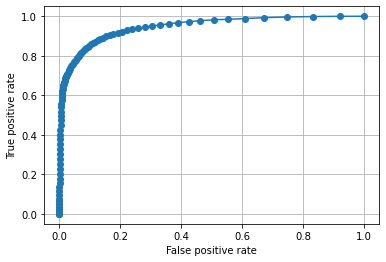

In [104]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred) #thresholds:しきい値
plt.plot(fpr, tpr, marker="o")
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.grid()
plt.show()

In [105]:
roc_auc_score(y_test,y_pred)

0.9474252359288986

In [108]:
params={
    'min_samples_split':500,
    'max_depth':None,
    'n_estimators':50,
    'criterion':'entropy',
    'class_weight':'balanced',
    'random_state':100
}
rf = RandomForestClassifier(**params)
rf.fit(X_train,y_train)
y_pred_train=rf.predict_proba(X_train)[:,1]
y_pred=rf.predict_proba(X_test)[:,1]
print(roc_auc_score(y_train,y_pred_train))
print(roc_auc_score(y_test,y_pred))

0.8381584175410841
0.8207752388860683


In [109]:
importances=pd.DataFrame({'features':X_train.columns,"importance":rf.feature_importances_})
importances.sort_values('importance',ascending=False)

,features,importance
3,単勝,0.393252
4,人気,0.373908
6,体重,0.014807
7,体重変化,0.010129
22,騎手_ルメール,0.009346
...,...,...
86,騎手_岩橋勇二,0.000000
82,騎手_山田雄大,0.000000
81,騎手_山田祥雄,0.000000
227,course_len_3210,0.000000


## 勾配ブースティング木

In [116]:
import lightgbm as lgb
params={
    'num_leaves':4,
    'n_estimators':80,
    'class_weight':'balanced',
    'random_state':100
}
lgb_clf=lgb.LGBMClassifier(**params)
lgb_clf.fit(X_train.values,y_train.values)
y_pred_train=lgb_clf.predict_proba(X_train)[:,1]
y_pred=lgb_clf.predict_proba(X_test)[:,1]
print(roc_auc_score(y_train,y_pred_train))
print(roc_auc_score(y_test,y_pred))

0.8184873628369356
0.8116883948305817


In [117]:
importances=pd.DataFrame({'features':X_train.columns,"importance":lgb_clf.feature_importances_})
importances.sort_values('importance',ascending=False)
#単勝，人気に依存しすぎている。

,features,importance
3,単勝,130
4,人気,23
6,体重,17
5,年齢,10
1,馬番,8
...,...,...
97,騎手_御神本訓,0
98,騎手_戸崎圭太,0
100,騎手_服部寿希,0
101,騎手_服部茂史,0


In [4]:
import requests
from bs4 import BeautifulSoup
import time
import re
from tqdm.notebook import tqdm
def scrape_race_results(race_id_list, pre_race_results={}):
    race_results = pre_race_results
    for race_id in tqdm(race_id_list):
        if race_id in race_results.keys():
            continue
        try:
            time.sleep(1)
            url = "https://db.netkeiba.com/race/" + race_id
            df=pd.read_html(url)[0]
            
            #horse_idとjockey_idをスクレイピング
            html=requests.get(url)
            html.encoding='EUC-JP'
            soup=BeautifulSoup(html.text,"html.parser")
            #horse_id
            horse_id_list=[]
            horse_a_list=\
                soup.find("table",attrs={'summary':'レース結果'}).find_all('a',attrs={'href':re.compile('^/horse')})
            for a in horse_a_list:
                horse_id_list.append(re.findall(r'\d+',a["href"])[0])
            #horse_id
            jockey_id_list=[]
            jockey_a_list=\
                soup.find("table",attrs={'summary':'レース結果'}).find_all('a',attrs={'href':re.compile('^/jockey')})
            for a in jockey_a_list:
                jockey_id_list.append(re.findall(r'\d+',a["href"])[0])
            
            df['horse_id']=horse_id_list
            df['jockey_id']=jockey_id_list
            
            race_results[race_id] = df
        except IndexError:
            continue
        except Exception as e:
            print(e)
        except:
            break
    return race_results

In [138]:
results=pd.read_pickle('results_addinfo.pickle')
race_id_list=results.index.unique()
results_new=scrape_race_results(race_id_list)

  0%|          | 0/3187 [00:00<?, ?it/s]

In [139]:
tes2=results_new
for key in tes2:
    tes2[key].index = [key] * len(tes2[key])
results = pd.concat([tes2[key] for key in tes2], sort=False)
results_addinfo=results.merge(race_infos,left_index=True,right_index=True,how='inner')
results_addinfo

,着順,枠番,馬番,馬名,性齢,斤量,騎手,タイム,着差,単勝,人気,馬体重,調教師,horse_id,jockey_id,course_len,weather,race_type,ground_state,date
201901010101,1,1,1,ゴルコンダ,牡2,54.0,ルメール,1:48.3,NaN,1.4,1.0,518(-16),[東] 木村哲也,2017105318,05339,1800,曇,芝,良,2019年7月27日
201901010101,2,3,3,プントファイヤー,牡2,54.0,岩田康誠,1:50.1,大,3.5,2.0,496(-8),[東] 手塚貴久,2017104612,05203,1800,曇,芝,良,2019年7月27日
201901010101,3,4,4,ラグリマスネグラス,牡2,51.0,団野大成,1:50.9,5,46.6,6.0,546(+6),[東] 藤沢和雄,2017103879,01180,1800,曇,芝,良,2019年7月27日
201901010101,4,8,9,キタノコドウ,牡2,51.0,菅原明良,1:51.5,3.1/2,56.8,7.0,458(-8),[東] 高木登,2017106259,01179,1800,曇,芝,良,2019年7月27日
201901010101,5,5,5,ネモフィラブルー,牡2,54.0,川島信二,1:51.7,1.1/2,140.3,9.0,436(0),[西] 矢作芳人,2017104140,01062,1800,曇,芝,良,2019年7月27日
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201910020812,10,7,12,オーシャンスケイプ,牝3,52.0,大野拓弥,1:49.8,3/4,45.7,10.0,414(+6),[西] 西村真幸,2016104557,01096,1800,曇,芝,良,2019年8月18日
201910020812,11,3,3,プリヴェット,牝4,55.0,藤岡康太,1:50.3,3,29.8,9.0,486(+2),[西] 今野貞一,2015101367,01116,1800,曇,芝,良,2019年8月18日
201910020812,12,5,7,アドマイヤクィーン,牝4,55.0,松山弘平,1:50.3,クビ,29.6,8.0,476(+6),[西] 須貝尚介,2015104794,01126,1800,曇,芝,良,2019年8月18日
201910020812,13,8,13,タムロドリーム,牝3,49.0,亀田温心,1:50.4,1/2,134.8,12.0,472(+2),[西] 西園正都,2016102212,01176,1800,曇,芝,良,2019年8月18日


In [6]:
import pandas as pd
r=pd.read_pickle('results_id.pickle')
r.head()

,着順,枠番,馬番,馬名,性齢,斤量,騎手,タイム,着差,単勝,人気,馬体重,調教師,horse_id,jockey_id,course_len,weather,race_type,ground_state,date
201901010101,1,1,1,ゴルコンダ,牡2,54.0,ルメール,1:48.3,NaN,1.4,1.0,518(-16),[東] 木村哲也,2017105318,05339,1800,曇,芝,良,2019年7月27日
201901010101,2,3,3,プントファイヤー,牡2,54.0,岩田康誠,1:50.1,大,3.5,2.0,496(-8),[東] 手塚貴久,2017104612,05203,1800,曇,芝,良,2019年7月27日
201901010101,3,4,4,ラグリマスネグラス,牡2,51.0,団野大成,1:50.9,5,46.6,6.0,546(+6),[東] 藤沢和雄,2017103879,01180,1800,曇,芝,良,2019年7月27日
201901010101,4,8,9,キタノコドウ,牡2,51.0,菅原明良,1:51.5,3.1/2,56.8,7.0,458(-8),[東] 高木登,2017106259,01179,1800,曇,芝,良,2019年7月27日
201901010101,5,5,5,ネモフィラブルー,牡2,54.0,川島信二,1:51.7,1.1/2,140.3,9.0,436(0),[西] 矢作芳人,2017104140,01062,1800,曇,芝,良,2019年7月27日


In [7]:
def scrape_horse_results(horse_id_list, pre_horse_results={}):
    horse_results = pre_horse_results
    for horse_id in tqdm(horse_id_list):
        if horse_id in horse_results.keys():
            continue
        try:
            time.sleep(1)
            url = "https://db.netkeiba.com/horse/" + horse_id
            df = pd.read_html(url)[3]
            if df.columns[0]=='受賞歴':
                df = pd.read_html(url)[4]
            horse_results[horse_id]=df
        except IndexError:
            continue
        except Exception as e:
            print(e)
        except:
            break
    return horse_results

In [27]:
horse_id_list=r["horse_id"].unique()
horse_results=scrape_horse_results(horse_id_list,tes2)

  0%|          | 0/11401 [00:00<?, ?it/s]

In [28]:
len(horse_results)

11401

In [29]:
tes2=horse_results
for key in tes2:
    tes2[key].index = [key] * len(tes2[key])
results_h = pd.concat([tes2[key] for key in tes2], sort=False)
results_h.to_pickle('horse_results.pickle')
results_h

,日付,開催,天気,R,レース名,映像,頭数,枠番,馬番,オッズ,...,着差,ﾀｲﾑ指数,通過,ペース,上り,馬体重,厩舎ｺﾒﾝﾄ,備考,勝ち馬(2着馬),賞金
2017105318,2020/12/26,5中山7,晴,9.0,立志賞(1勝クラス),NaN,18.0,6.0,12,3.5,...,1.9,**,1-1-1-1,37.5-36.8,38.7,570(+18),NaN,NaN,ルトロヴァイユ,NaN
2017105318,2020/08/02,1札幌4,晴,7.0,3歳以上1勝クラス,NaN,8.0,8.0,8,1.5,...,0.2,**,7-6-4-4,36.6-34.7,34.5,552(+28),NaN,NaN,シャムロックヒル,110.0
2017105318,2019/08/31,2札幌5,曇,11.0,札幌2歳S(G3),NaN,12.0,7.0,10,1.8,...,0.6,**,10-7-7-2,36.0-37.3,37.3,524(+6),NaN,NaN,ブラックホール,NaN
2017105318,2019/07/27,1札幌1,曇,1.0,2歳未勝利,NaN,9.0,1.0,1,1.4,...,-1.8,**,1-1-1-1,35.9-36.5,36.5,518(-16),NaN,NaN,(プントファイヤー),500.0
2017105318,2019/06/09,3東京4,曇,5.0,2歳新馬,NaN,11.0,4.0,4,4.8,...,0.5,**,8-8-2,38.7-33.5,34.0,534(0),NaN,NaN,ワーケア,180.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017104899,2020/10/17,佐賀,晴,11.0,夜のウーマんチャンス,NaN,11.0,6.0,6,1.2,...,1.5,**,4-7,0.0-37.7,38.9,464(-3),NaN,NaN,ナムライト,NaN
2017104899,2020/10/03,佐賀,晴,6.0,このあとイルミネーシ,NaN,12.0,7.0,10,2.1,...,1.8,**,5-6-5-6,0.0-39.4,40.6,467(+23),NaN,NaN,サツキヒューズ,NaN
2017104899,2020/07/18,4阪神5,晴,4.0,3歳未勝利,NaN,18.0,8.0,18,160.4,...,4.2,**,9-8-9-18,34.7-37.7,40.7,444(-12),NaN,NaN,ダノンレガーロ,NaN
2017104899,2020/06/27,3阪神7,曇,6.0,3歳未勝利,NaN,16.0,7.0,13,63.1,...,1.3,**,9-9-8-10,37.2-35.7,36.3,456(+16),NaN,NaN,ウィズダイヤモンズ,NaN


In [30]:
import pickle

with open("horse.pkl","wb") as f:
    pickle.dump(tes2, f)

In [31]:
with open('horse.pkl', 'rb') as f:
    resh = pickle.load(f)